Name: S.lakshmi praveen

Regno: 21bec7266

Task-1

load the dataset

In [96]:
import pandas as pd
#Replace 'filename.csv' with the actual name of your CSV file.
df= pd.read_csv('winequality-red.csv')
#display the first few rows of the dataframe to verify the data.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Task-2

Data Preporcessing including visualization

In [97]:
#Get summary statistics of numerical columns.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [98]:
from pandas.core.series import missing
#Check for missing values.
missing_values=df.isnull().sum()
print(missing_values)
#Impute missing values with the mean for numerical columns.
df.fillna(df.mean(),inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Countplot

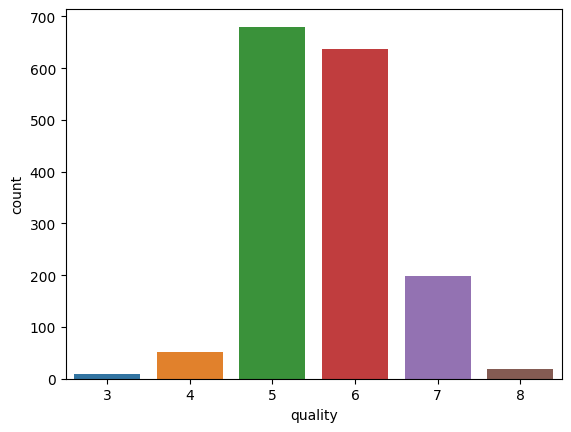

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
#Example: Countplot for the 'quality' column.
sns.countplot(data=df, x='quality')
plt.show()

Correlation Matrix

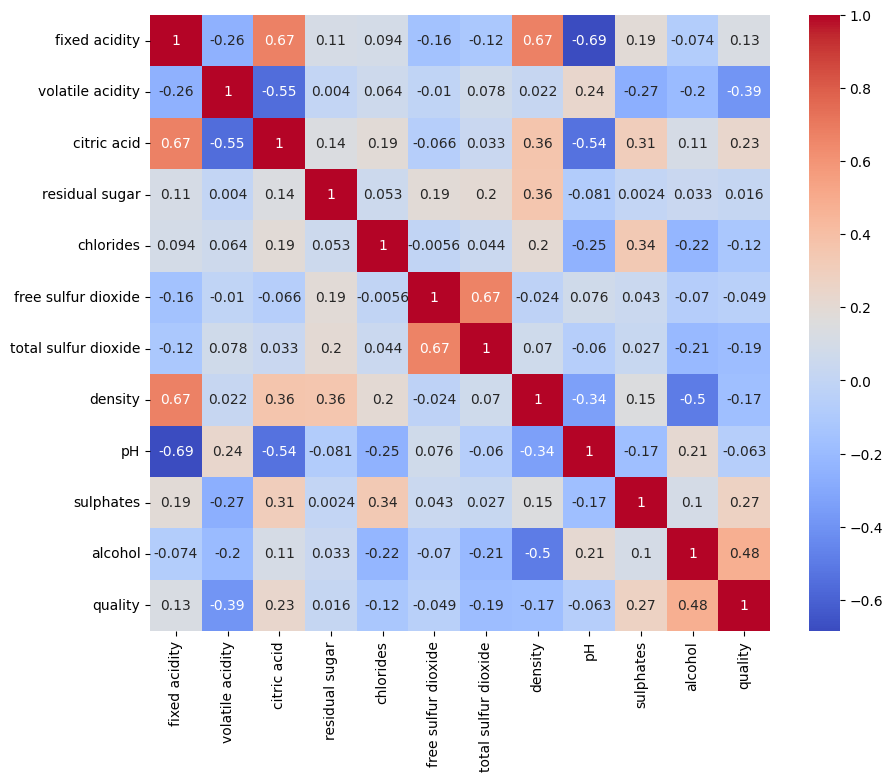

In [100]:
import seaborn as sns
#calculate the correlation matrix
corr_matrix=df.corr()
#Create a heatmap of the correlation matrix.
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

task - 4

Machine learning model building

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [102]:
#Split the data into train and test split and we use 20 percent data for testing
x_train,x_test,y_train,y_test=train_test_split(df.drop("quality", axis=1),
                                               df["quality"],
                                               test_size=0.2,
                                               random_state=42)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((1276, 11), (320, 11), (1276,), (320,))

In [103]:
#Data Preprocessing (--normalise the values of dataset)
std= StandardScaler()
x_train= std.fit_transform(x_train)
x_test=std.transform(x_test)

In [104]:
#Defining Models
models=[
    LinearRegression(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    Lasso(),
    Ridge(),
    ElasticNet()
]

In [105]:
from tables.file import parameters
#Defining Parameters

Linear_param={'n_jobs':[-1]}
Random_param={'n_estimators':[100,200],
              'max_depth':[6,8],
              'min_samples_split':[2,4],
              'criterion':['squared_error'],
              }
Decision_param={'splitter':['best'],
                'max_depth':[8,10],
                'min_samples_split':[2],
                'criterion':['squared_error'],
                }
gradient_param={'n_estimators':[100,200],\
                'learning_rate':[0.1,0.01,0.001],
                'max_depth':[8,10],
                'min_samples_leaf':[2,4,5],
                'loss':['squared_error'],
                }
SVR_param={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
           }
Lasso_param={'alpha':[1.0,1.1],
             'max_iter':[1000,1200],
             'selection':['cyclic','random']
             }
Ridge_param={'alpha':[1.0,1.1],
             'max_iter':[1000,1200],
             'solver':['auto','svd','lsqr']
             }
ElasticNet_param={'alpha':[1.0,1.1],
                  'max_iter':[1000,1400],
                  'selection':['cyclic','random']
                  }
parameters=[
    Linear_param,
    Random_param,
    Decision_param,
    gradient_param,
    SVR_param,
    Lasso_param,
    Ridge_param,
    ElasticNet_param
]

Task 5

Evaluate the model

hyperparameter Tuning


In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

result = {}
for i in range(len(models)):
    temp = []
    regressor = GridSearchCV(models[i], parameters[i], cv=2, scoring="r2", n_jobs=-1).fit(x_train, y_train)
    best_parameters = regressor.best_params_
    model_name = models[i].__class__.__name__  # Correctly get the class name
    y_pred = regressor.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    temp.append(mse)
    result[model_name] = temp

In [107]:
result
final_results=pd.DataFrame(result)
final_results=final_results.T
final_results.columns=["MeanSquaredError"]
final_results

,MeanSquaredError
LinearRegression,0.439650
RandomForestRegressor,0.388944
DecisionTreeRegressor,0.469986
GradientBoostingRegressor,0.397105
SVR,0.389994
Lasso,0.666184
Ridge,0.439648
ElasticNet,0.666184


Task-5

Test with Random Observation

In [108]:
#create a random odservation (replace with actual feature values)
random_observation= [7.0,0.6,0.1,2.0,0.075,20,50,0.9975,3.4,0.6,10.0]
#Reshape the random observation to match the input format (1 sample).
random_observation = np.array(random_observation).reshape(1,-1)
#use the best model from GridSearchCV to predict.
prediction_grid_search=regressor.predict(random_observation)
print(f"GridSearchCV Prediction: {prediction_grid_search[0]}")

GridSearchCV Prediction: 5.64576802507837
